In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

## Mouse Data

In [2]:
mouse = pd.read_csv('./mouse.txt', sep=" ", header=None)

In [3]:
mouse.head(3)

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606


In [4]:
x_mouse = mouse.values

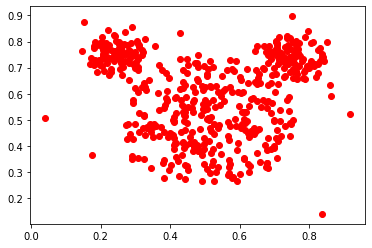

In [5]:
plt.plot(x_mouse[:, 0], x_mouse[:,1], 'ro')
plt.show()

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix

In [7]:
IF = IsolationForest(n_estimators=500, random_state=1, n_jobs=-1)
IF.fit(x_mouse)
score = IF.decision_function(x_mouse)

#anomalie = IF.predict(x_mouse) si contamination

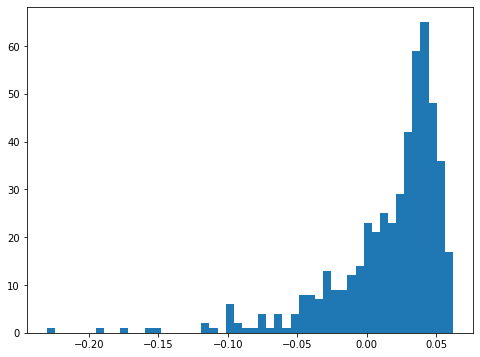

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(score, bins=50)
plt.show()

In [9]:
anomalie=np.zeros(len(x_mouse))
anomalie[score <= -0.08] = 1

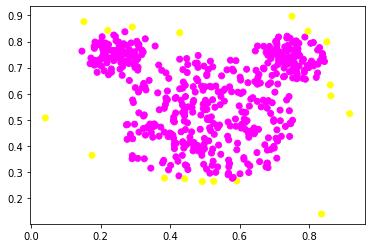

In [10]:
plt.scatter(x_mouse[:, 0], x_mouse[:,1], c=anomalie, cmap=plt.get_cmap("spring"))
plt.show()

## Credit Card Data

In [11]:
credit_card = pd.read_csv('./creditcard.csv', sep=",")

In [12]:
credit_card.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [13]:
credit_card = credit_card.drop(credit_card.columns[0], axis='columns')
carte_classe_0=credit_card[credit_card['Class'] == 0].sample(n=10000)
carte_classe_1=credit_card[credit_card['Class'] == 1]
credit_card=pd.concat([carte_classe_0,carte_classe_1])
credit_card.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184998,1.875662,-0.178743,-1.592915,0.580895,0.231340,-1.044879,0.610346,-0.404887,-0.090997,0.232227,...,0.091799,0.317337,-0.016763,0.163886,0.183679,0.341879,-0.094532,-0.066651,85.98,0
218680,-0.762961,1.897243,1.931378,4.191413,0.103570,1.367957,-0.210296,0.799408,-1.949474,1.156634,...,-0.217645,-0.639138,-0.096265,0.417441,0.001403,0.194527,0.236362,0.106503,0.76,0
90398,-0.285443,0.962116,1.394657,0.463027,0.171963,-0.023899,0.410077,0.193947,-0.838779,-0.315080,...,-0.102287,-0.312792,0.030737,-0.032220,-0.732645,0.180019,0.133551,0.142740,1.98,0


In [14]:
x_credit_card = credit_card.values

In [15]:
IF_cc = IsolationForest(n_estimators=500, random_state=1, n_jobs=-1)
IF_cc.fit(x_credit_card)
score_cc = IF_cc.decision_function(x_credit_card)

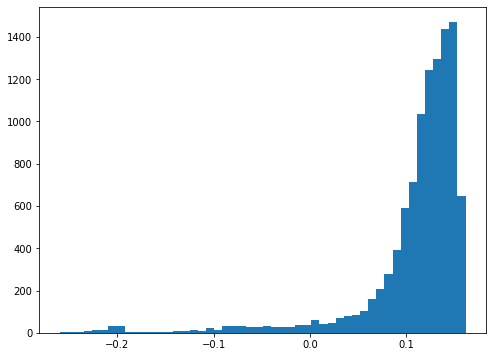

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(score_cc, bins=50)
plt.show()

In [33]:
anomalie_cc=np.zeros(len(x_credit_card))
anomalie_cc[score_cc <= -0.15] = 1

In [40]:
confusion_matrix(credit_card["Class"], anomalie_cc)

array([[9989,   11],
       [ 378,  114]], dtype=int64)

In [ ]:
# Analyse : Avec un seuil à -0.15 (là où il semble y avoir un décrochage sur l'histogramme), on rammène 114 vraies fraudes et 11
# fausses fraudes, néanmoins, 378 vraies fraudes ne sont pas détectées, ce qui n'est pas forcément bon. Essayons d'augmenter ce
# seuil.

In [41]:
anomalie_cc=np.zeros(len(x_credit_card))
anomalie_cc[score_cc <= -0.10] = 1
confusion_matrix(credit_card["Class"], anomalie_cc)

array([[9979,   21],
       [ 319,  173]], dtype=int64)

In [ ]:
# Analyse : Avec un seuil à -0.10, on rammène 173 vraies fraudes et 21 fausses fraudes, néanmoins, 319 vraies fraudes 
# ne sont pas détectées, ce qui n'est pas forcément bon. On rammène plus de vraies fraudes qu'avec un seuil à -0.15, le nombre
# de fausses fraudes rammenées est plutôt négligeable. Et le nombre de fraudes ratées a diminué. Essayons encore d'augmenter ce
# seuil.

In [42]:
anomalie_cc=np.zeros(len(x_credit_card))
anomalie_cc[score_cc <= 0.0] = 1
confusion_matrix(credit_card["Class"], anomalie_cc)

array([[9828,  172],
       [ 125,  367]], dtype=int64)

In [ ]:
# Analyse : Avec un seuil à 0.0, le résultat est nettement plus satisfaisant, le nombre de vraies fraudes détectées est très
# élevée, néanmoins, on a aussi beaucoup détécté de fraudes qui n'en étaient pas. Essayons de diminuer un peu le seuil.

In [52]:
anomalie_cc=np.zeros(len(x_credit_card))
anomalie_cc[score_cc <= -0.02] = 1
confusion_matrix(credit_card["Class"], anomalie_cc)

array([[9876,  124],
       [ 155,  337]], dtype=int64)

In [ ]:
# Analyse : Avec un seuil à -0.025, le résultat semble être un compromis entre, avoir un bonne détection des vraies fraudes
# tout en détectant le moins possible de fausses fraudes et tout en essayant d'oublier les moins possible de vraies fraudes.